<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula05c_multilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y)

In [2]:
def plotHiperplano(vector, intercept=0, dataset=None):
  xs = np.array([0, 1])
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'r-')

In [3]:
def sign(a):
  return (a>=0)*2-1

In [25]:
import numpy as np
from sklearn.datasets import make_blobs

def criaDataset(n=40, func=lambda a, b: bool(a) != bool(b)):
  X, y = make_blobs(n_samples=n, centers=[[0,0],[1,0],[1,1],[0,1]], cluster_std=0.1)
  y = np.array([func(a>0.5, b>0.5) for a, b in zip(X[:,0], X[:,1])], dtype=int)*2-1
  return X, y

X, y = criaDataset()

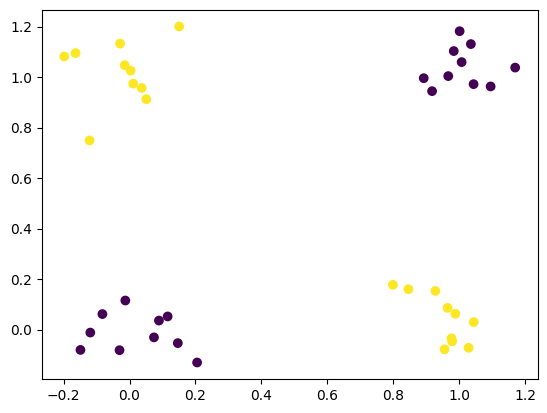

In [26]:
plotDataset(X, y)
plt.show()

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

In [7]:
include_bias = lambda X: np.c_[np.ones(X.shape[0]), X]

In [8]:
from scipy.special import expit

def tanh(a):
  return expit(a)*2-1

In [9]:
def defineAxes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

1.0


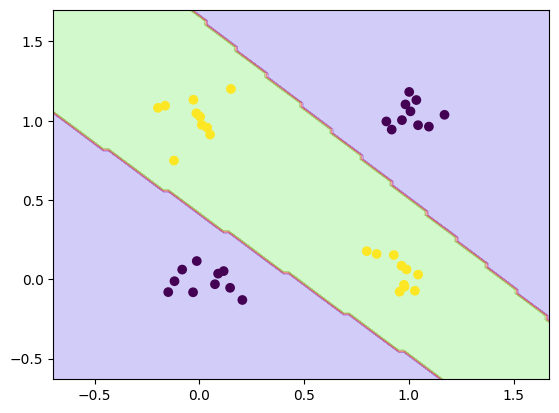

In [28]:
class MultiLayer(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=1000, learning_rate=0.01, n_hidden=[2]):
    self.max_iter = max_iter
    self.learning_rate = learning_rate
    self.n_hidden = n_hidden

  def foward(self, X):
    self.A = []
    self.Z = []
    AUX = X.copy()
    for W in self.Ws:
      self.A.append(include_bias(AUX))
      self.Z.append(self.A[-1] @ W)
      AUX = tanh(self.Z[-1])
    return AUX

  def backward(self, Xb, y, ypred):
    grads = []
    output_delta = y - ypred
    grads.insert(0, self.A[-1].T @ output_delta)
    for i in range(len(self.Ws)-1, 0, -1):
      tanh_grad = (1 - np.square(tanh(self.Z[i-1])))
      input_delta = (output_delta @ self.Ws[i][1:, :].T) * tanh_grad
      grads.insert(0, self.A[i-1].T @ input_delta)
      output_delta = input_delta.copy()
    for i in range(len(self.Ws)-1, -1, -1):
      self.Ws[i] += grads[i] * self.learning_rate

  def fit(self, X, y):
    self.Ws = []
    previous_output = X.shape[1]
    for layer_size in self.n_hidden:
      self.Ws.append(np.random.uniform(-1, 1, size=(previous_output+1, layer_size)))
      previous_output = layer_size
    if len(y.shape) == 1:
      y = y.reshape(-1, 1)
    self.Ws.append(np.random.uniform(-1, 1, size=(previous_output+1, y.shape[1])))
    for _ in range(self.max_iter):
      ypred = self.foward(X)
      self.backward(X, y, ypred)
    return self

  def predict(self, X):
    ypred = self.foward(X)
    return sign(ypred)

model = MultiLayer()
model.fit(X, y)
print(accuracy_score(y, model.predict(X)))
plotPredictions(model, X)
plotDataset(X, y)
plt.show()

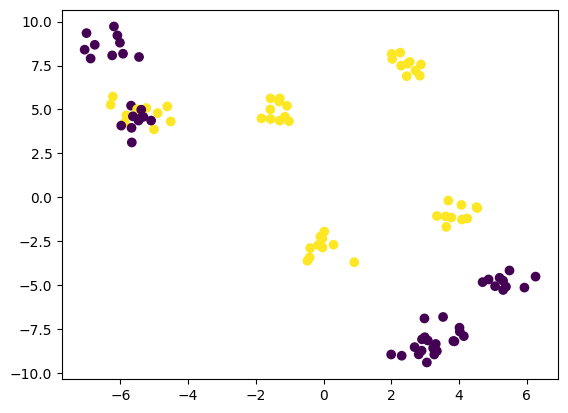

In [36]:
def criaDatasetDificil(n=100, centers=10, std=0.5):
  X, y = make_blobs(n_samples=n, centers=centers, cluster_std=std)
  y = sign(np.array(y%2, dtype=int)*2-1)
  return X, y

X, y = criaDatasetDificil()

plotDataset(X, y)
plt.show()


0.9


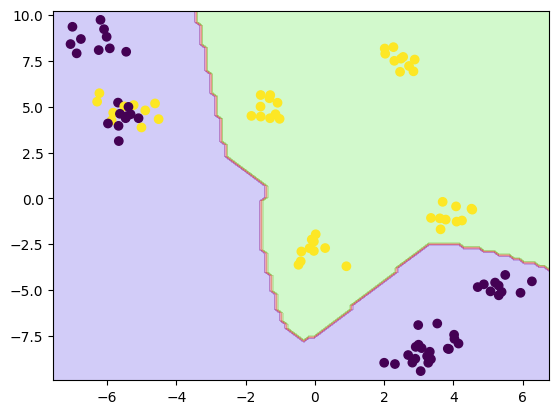

In [39]:
model = MultiLayer(n_hidden=[5])
model.fit(X, y)
print(accuracy_score(y, model.predict(X)))
plotPredictions(model, X)
plotDataset(X, y)
plt.show()

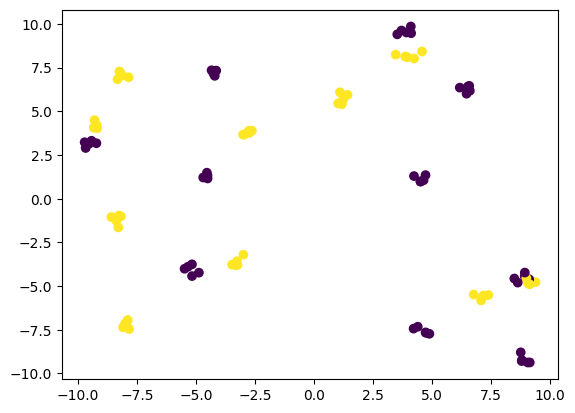

In [42]:
X, y = criaDatasetDificil(centers=20, std=0.2)
plotDataset(X, y)
plt.show()

0.89


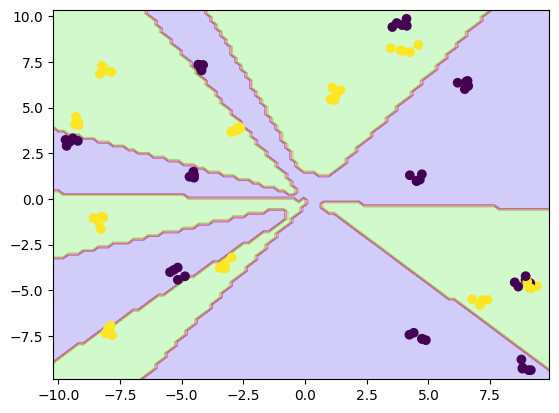

In [66]:
model = MultiLayer(n_hidden=[20, 5])
model.fit(X, y)
print(accuracy_score(y, model.predict(X)))
plotPredictions(model, X)
plotDataset(X, y)
plt.show()